# Imputation Research Project <img src="https://i.pinimg.com/564x/f5/8a/61/f58a61cf2d06682e309489166b5fb8fb.jpg" alt="Alt text image not displaying" width="300" style="float: right;"/>
## Notebook 1.1: Exploratory Data Analysis

**Author:** Chike Odenigbo

**Date:** November 22nd, 2022

**Notebook Structure:**

* 1.0 Preprocessing

* **1.1 Exploratory Data Analysis**

* 1.2 Masking

* 2.* Models


### Step 1: Import Requirements 


In [1]:
import pandas as pd
from scipy.stats import variation
from src.preprocessing.preprocessing import NumericalVariableCleaner, NumericalMasker # utility preprocessing packages found in src folder
import os
from src.visualization.visualize import histogram, box_plot, bar_plot
from itertools import chain, combinations
from pathlib import Path
from notebook_config import ROOT_DIR # setup.py file changed the root of the project so it is set in the config file
ROOT_DIR = ROOT_DIR.as_posix() # convert root path to windows readable path (i.e. change backslash to forward slash)
import json
import numpy as np

In [2]:
notebook_nm = '1.1-explorations'
fig_dir = f'{ROOT_DIR}/reports/figures/'
output_prefix = notebook_nm

In [3]:
def all_subsets(ss):
    return list(chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1))))

#.head(20)
def convert(val):
    return (list(val))

In [4]:
nutrition_df = pd.read_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv')
nutrition_df

,name,serving_size,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,"Nuts, pecans",100,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,"Eggplant, raw",100,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,"Teff, uncooked",100,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",100,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,"Lamb, cooked, separable lean only, composite o...",100,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,"Lamb, raw, separable lean and fat, composite o...",100,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


In [5]:
nutrition_df['name_list'] = nutrition_df.name.str.lower().str.split(',')
s = nutrition_df['name_list'].apply(all_subsets).explode().value_counts()
food_n_grams_df = s.rename_axis('food_combinations').reset_index(name='observation_count')
food_n_grams_df = food_n_grams_df[food_n_grams_df.observation_count>40]
food_n_grams_df['food_combinations'] = food_n_grams_df.food_combinations.apply(convert)
food_n_grams_df['food_combinations_number_units'] = food_n_grams_df['food_combinations'].str.len()
food_n_grams_df['food_combinations'] = food_n_grams_df['food_combinations'].apply(', '.join)
unigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 1]
bigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 2]
trigram = food_n_grams_df[food_n_grams_df['food_combinations_number_units'] == 3]

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_observation_count_hist.png


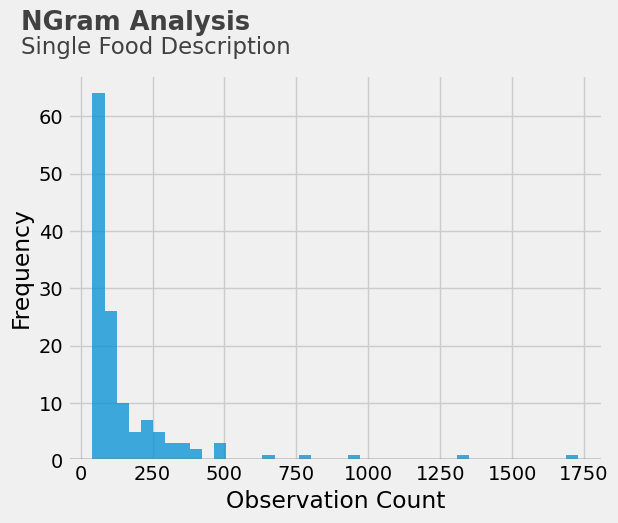

In [6]:
histogram(df = unigram, col = 'observation_count',output_prefix = f'{notebook_nm}-unigram',fig_dir = fig_dir, subtitle = 'Single Food Description', bins = 40,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_observation_count_boxplot.png


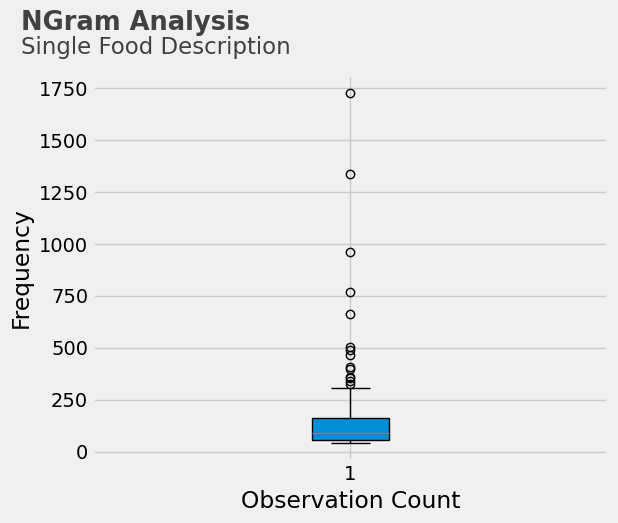

In [7]:
box_plot(df = unigram, col = 'observation_count', subtitle = 'Single Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-unigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-unigram_food_combinations_observation_count_barchart.png


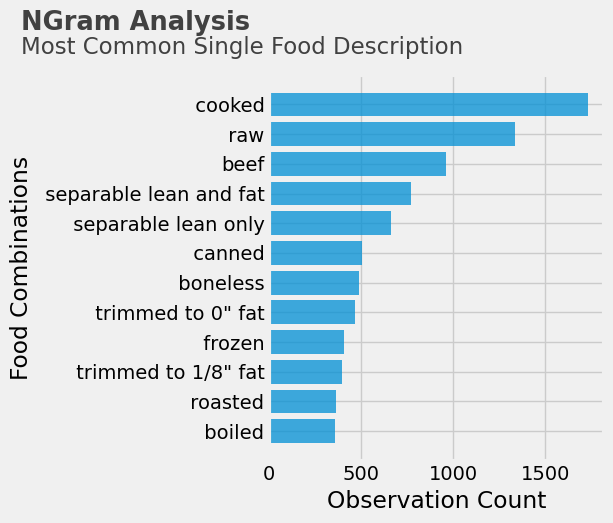

In [8]:
bar_plot(df = unigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Single Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-unigram', n_cols = 12)

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_observation_count_hist.png


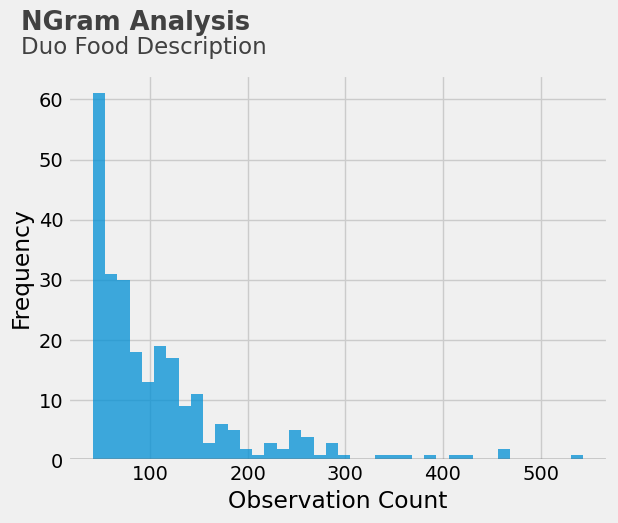

In [9]:
histogram(df = bigram, col = 'observation_count',output_prefix = f'{notebook_nm}-bigram',fig_dir = fig_dir, subtitle = 'Duo Food Description', bins = 40,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_observation_count_boxplot.png


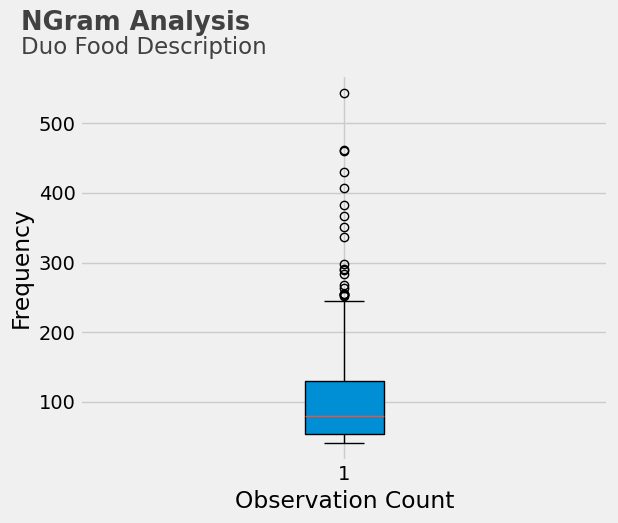

In [10]:
box_plot(df = bigram, col = 'observation_count', subtitle = 'Duo Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-bigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-bigram_food_combinations_observation_count_barchart.png


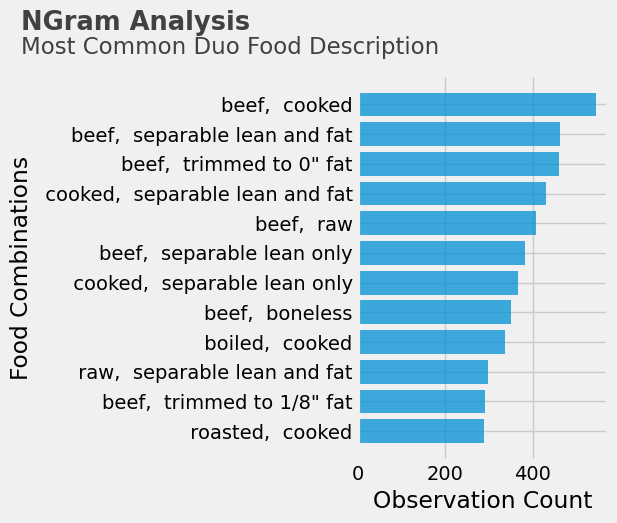

In [11]:
bar_plot(df = bigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Duo Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-bigram', n_cols = 12)

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_observation_count_hist.png


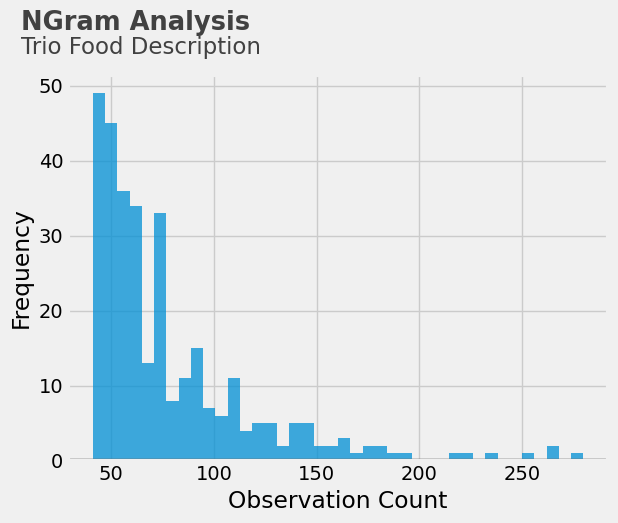

In [12]:
histogram(df = trigram, col = 'observation_count',output_prefix = f'{notebook_nm}-trigram',fig_dir = fig_dir, subtitle = 'Trio Food Description', bins = 40,title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_observation_count_boxplot.png


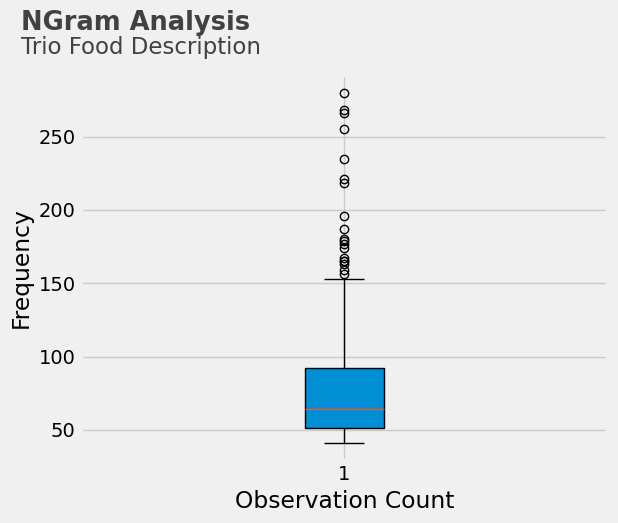

In [13]:
box_plot(df = trigram, col = 'observation_count', subtitle = 'Trio Food Description', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-trigram',title ='NGram Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-trigram_food_combinations_observation_count_barchart.png


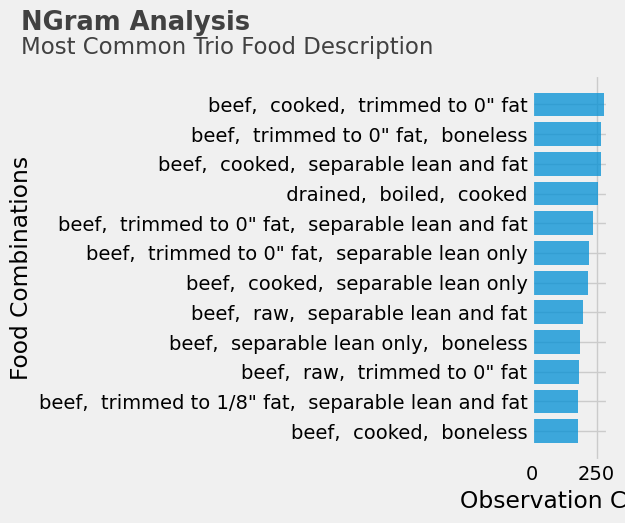

In [14]:
bar_plot(df = trigram,x = 'food_combinations',y = 'observation_count',title = 'NGram Analysis',subtitle = 'Most Common Trio Food Description',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-trigram', n_cols = 12)

In [15]:
nutrition_df["name_short"] = nutrition_df["name_list"].str[0]
food_item_df = nutrition_df["name_short"].value_counts().rename_axis('food_item').reset_index(name = 'observation_count')
food_item_df = food_item_df[food_item_df.observation_count>10]

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_observation_count_hist.png


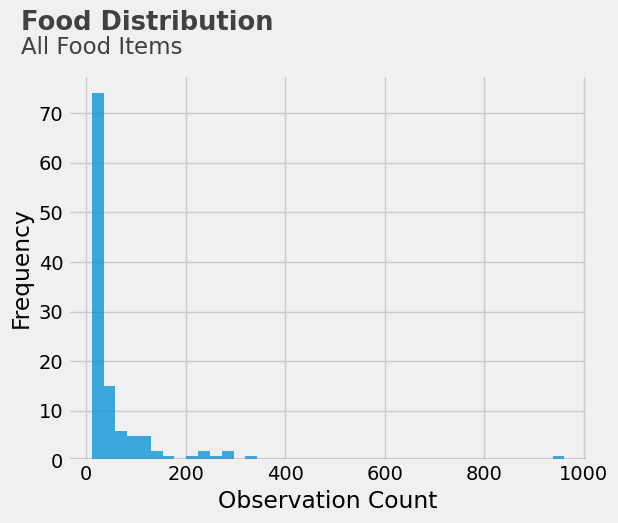

In [16]:
histogram(df = food_item_df, col = 'observation_count',output_prefix = f'{notebook_nm}-food-item',fig_dir = fig_dir, subtitle = 'All Food Items', bins = 40,title ='Food Distribution')

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_observation_count_boxplot.png


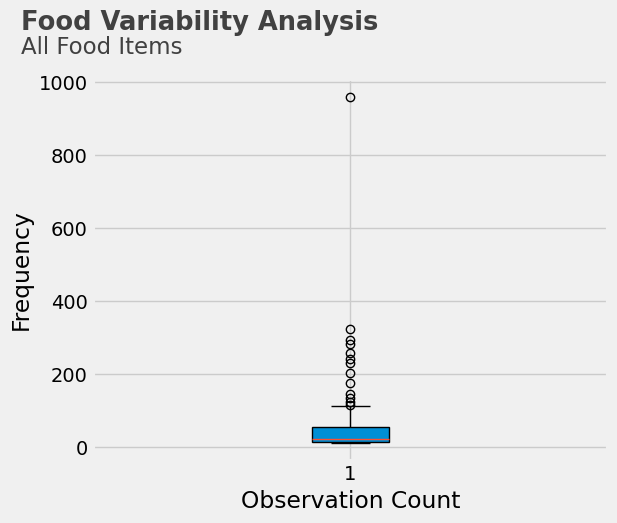

In [17]:
box_plot(df = food_item_df, col = 'observation_count', subtitle = 'All Food Items', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-food-item',title ='Food Variability Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-food-item_food_item_observation_count_barchart.png


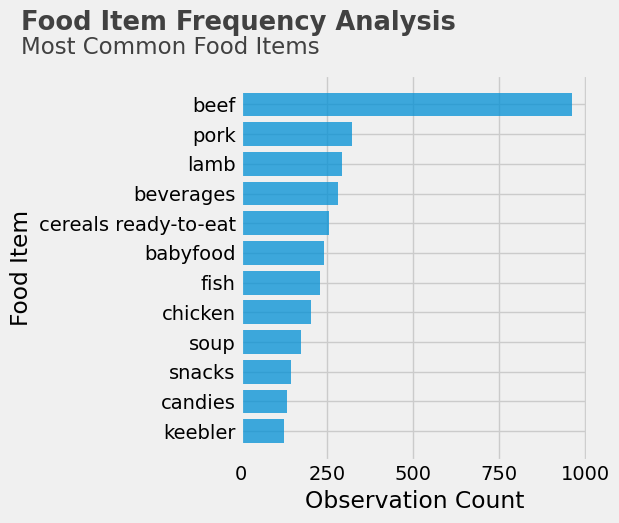

In [18]:
bar_plot(df = food_item_df,x = 'food_item',y = 'observation_count',title = 'Food Item Frequency Analysis',subtitle = 'Most Common Food Items',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-food-item', n_cols = 12)

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_variation_coefficient_hist.png


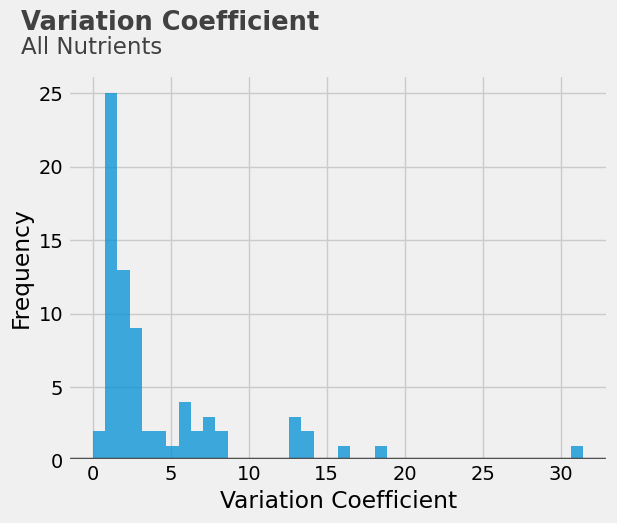

In [19]:
cv_list = np.std(nutrition_df, axis=0, ddof=1)/np.mean(nutrition_df, axis=0)
cv_df = cv_list.rename_axis('nutrient').reset_index(name='variation_coefficient').sort_values('variation_coefficient',ascending = False)
histogram(df = cv_df, col = 'variation_coefficient',output_prefix = f'{notebook_nm}-coefficient-variation',fig_dir = fig_dir, subtitle = 'All Nutrients', bins = 40)

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_variation_coefficient_boxplot.png


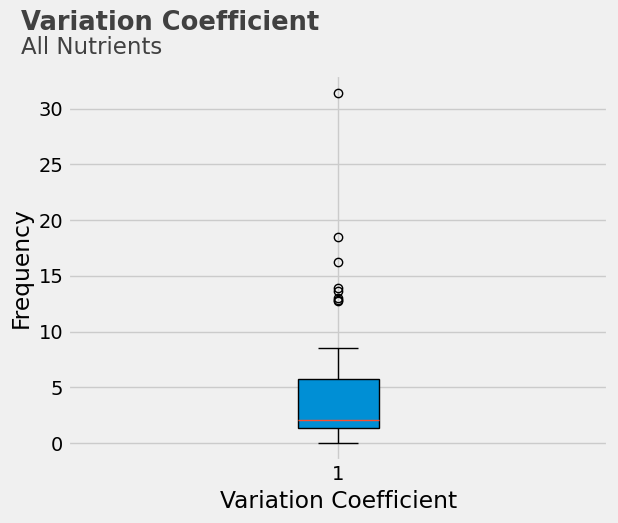

In [20]:
box_plot(df = cv_df, col = 'variation_coefficient', subtitle = 'All Nutrients', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-coefficient-variation')

Image found in the "reports/figures" folder saved under 1.1-explorations-coefficient-variation_nutrient_variation_coefficient_barchart.png


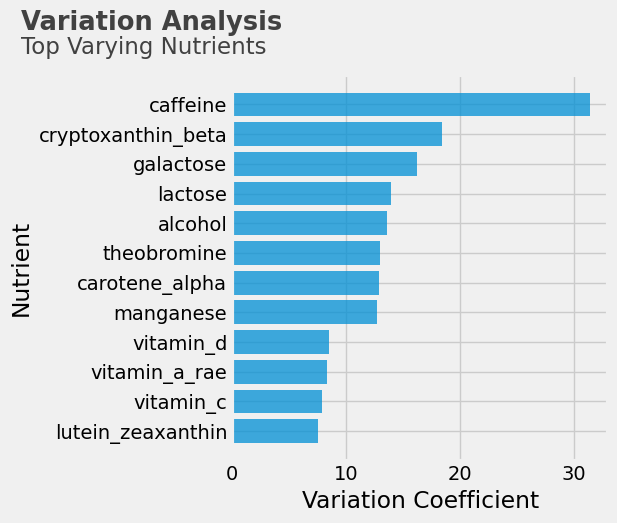

In [21]:
bar_plot(df = cv_df,x = 'nutrient',y = 'variation_coefficient',title = 'Variation Analysis',subtitle = 'Top Varying Nutrients',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-coefficient-variation', n_cols = 12)

In [22]:
missing_df = (nutrition_df.isnull().mean() * 100).rename_axis('nutrient').reset_index(name='missing_rate').sort_values('missing_rate',ascending=False)
missing_df.head(10)

,nutrient,missing_rate
3,saturated_fat,18.090795
0,name,0.000000
48,phenylalanine,0.000000
55,carbohydrate,0.000000
54,valine,0.000000
53,tyrosine,0.000000
52,tryptophan,0.000000
51,threonine,0.000000
50,serine,0.000000
49,proline,0.000000


### Step 2: Clean Data

In [23]:
Q1 = nutrition_df.quantile(0.25)
Q3 = nutrition_df.quantile(0.75)
IQR = Q3 - Q1
outlier_df=(((nutrition_df < (Q1 - 1.5 * IQR)) | (nutrition_df > (Q3 + 1.5 * IQR))).sum()).rename_axis('nutrient').reset_index(name='outlier_count').sort_values('outlier_count',ascending = False)

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_nutrient_outlier_count_barchart.png


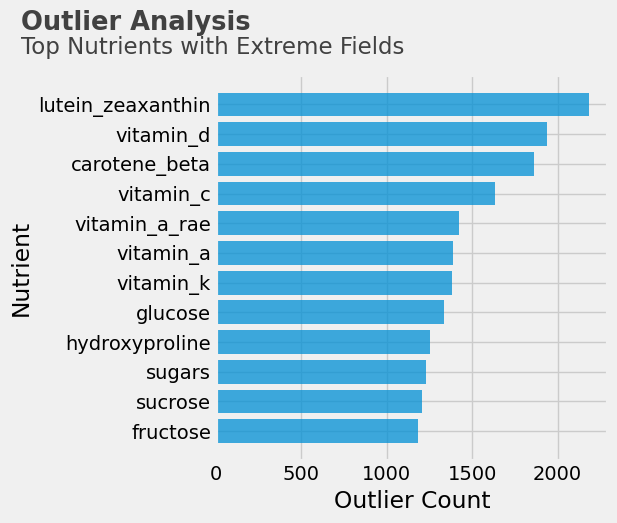

In [24]:
bar_plot(df = outlier_df,x = 'nutrient',y = 'outlier_count',title = 'Outlier Analysis',subtitle = 'Top Nutrients with Extreme Fields',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-outliers', n_cols = 12)

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_outlier_count_boxplot.png


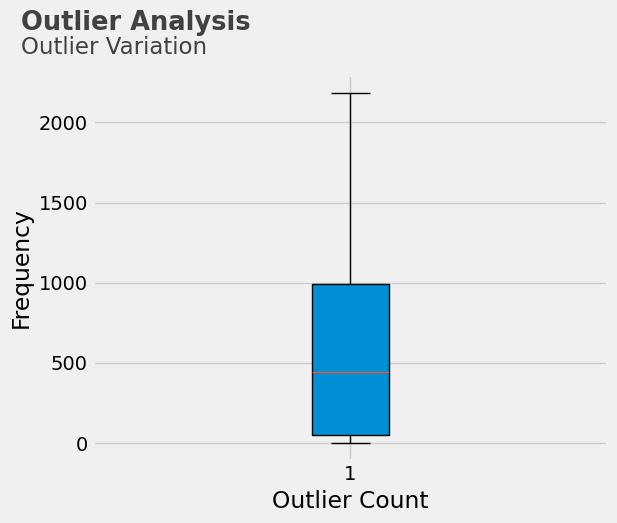

In [25]:
box_plot(df = outlier_df, col = 'outlier_count', subtitle = 'Outlier Variation', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-outliers',title = 'Outlier Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_outlier_count_hist.png


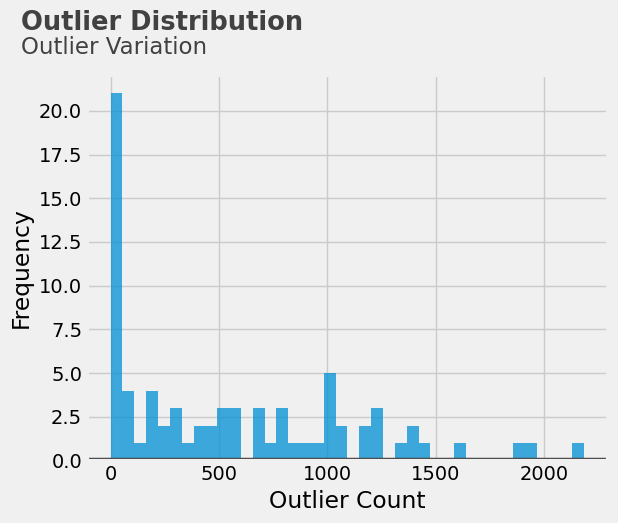

In [26]:
histogram(df = outlier_df, col = 'outlier_count',output_prefix = f'{notebook_nm}-outliers',fig_dir = fig_dir, subtitle = 'Outlier Variation', bins = 40,title ='Outlier Distribution')

In [27]:
zero_counts_df = pd.DataFrame({'nutrient':nutrition_df.columns,
              'zero_value_counts':np.count_nonzero(nutrition_df.fillna(1)==0,axis=0)}).sort_values('zero_value_counts',ascending = False)
zero_counts_df['z_score_zero_value_counts'] = (zero_counts_df['zero_value_counts'] - zero_counts_df['zero_value_counts'].mean())/zero_counts_df['zero_value_counts'].std(ddof=1)
zero_counts_df.head(20)

,nutrient,zero_value_counts,z_score_zero_value_counts
69,alcohol,8715,1.964985
59,galactose,8602,1.922415
72,theobromine,8545,1.900942
71,caffeine,8488,1.879468
61,lactose,8390,1.842549
62,maltose,8092,1.730285
15,carotene_alpha,8000,1.695626
17,cryptoxanthin_beta,7976,1.686584
8,folic_acid,7606,1.547196
58,fructose,7605,1.546819


Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_zero_value_counts_hist.png


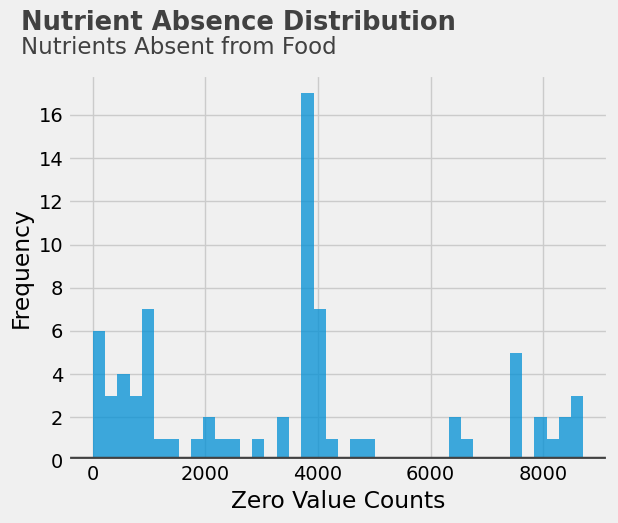

In [28]:
histogram(df = zero_counts_df, col = 'zero_value_counts',output_prefix = f'{notebook_nm}-outliers',fig_dir = fig_dir, subtitle = 'Nutrients Absent from Food', bins = 40,title ='Nutrient Absence Distribution')

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_zero_value_counts_boxplot.png


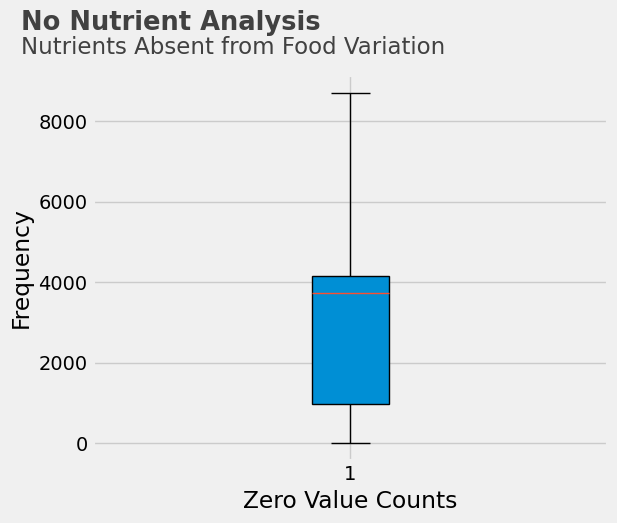

In [29]:
box_plot(df = zero_counts_df, col = 'zero_value_counts', subtitle = 'Nutrients Absent from Food Variation', fig_dir = fig_dir,output_prefix = f'{notebook_nm}-outliers',title = 'No Nutrient Analysis')

Image found in the "reports/figures" folder saved under 1.1-explorations-outliers_nutrient_zero_value_counts_barchart.png


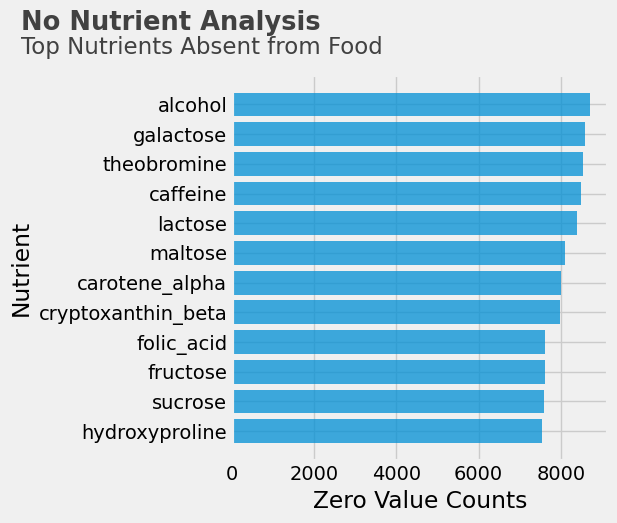

In [30]:
bar_plot(df = zero_counts_df,x = 'nutrient',y = 'zero_value_counts',title = 'No Nutrient Analysis',subtitle = 'Top Nutrients Absent from Food',fig_dir = fig_dir, output_prefix = f'{notebook_nm}-outliers', n_cols = 12)

In [31]:
stop

NameError: name 'stop' is not defined

In [ ]:
non_zero_counts_df = pd.DataFrame({'nutrient':nutrition_df.columns,
              'non_zero_value_counts':np.count_nonzero(nutrition_df,axis=0)}).sort_values('non_zero_value_counts',ascending = False)
non_zero_counts_df.head(10)

In [ ]:
np.count_nonzero(nutrition_df,axis=0)

In [ ]:
cleaner = NumericalVariableCleaner()
nutrition_clean_df = cleaner.clean(nutrition_df,col_ignore = ['name'])

In [ ]:
cleaner._measure_units

In [ ]:
nutrition_clean_df

### Step 3: Output Data 

In [ ]:
nutrition_clean_df.to_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv', index=False)

In [ ]:
with open(f'{ROOT_DIR}/references/nutrient_measure_units.json', 'w') as fp:
    json.dump(cleaner._measure_units, fp)